In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_north = pd.read_csv("../Resources/northern_county_market_no_symbols.csv")

In [3]:
# Datetime
df_north['Start Date'] = pd.to_datetime(df_north['Start Date'])
df_north['End Date'] = pd.to_datetime(df_north['End Date'])
# Separate years
df_north_2022 = df_north[df_north['Start Date'] == '2022-01-01']
df_north_2023 = df_north[df_north['Start Date'] == '2023-01-01']
df_north_2024 = df_north[df_north['Start Date'] == '2024-01-01']

In [4]:
df_north_essex = df_north[df_north['County'] == 'Essex County']
df_north_essex

,Start Date,End Date,County,Region,State,Property Type,Median Sale Price,Median Sale Price MoM,Median List Price,Median List Price MoM,...,Median Days on Market,Median Days on Market MoM,Average Sale to List,Average Sale to List MoM,Sold Above List,Sold Above List MoM,Price Drops,Price Drops MoM,Off Market in Two Weeks,Off Market in Two Weeks MoM
140,2022-01-01,2022-01-31,Essex County,North,NJ,All Residential,463500.0,-3.08%,"$485,000.00",14.12%,...,45,500.00%,103.41%,-0.44%,59.62%,-3.10%,5.20%,-1.33%,34.05%,11.45%
141,2022-01-01,2022-01-31,Essex County,North,NJ,Condo,240000.0,0.21%,"$485,000.00",14.12%,...,81,800.00%,99.81%,-0.44%,36.84%,-8.40%,6.12%,-2.65%,14.29%,-13.71%
142,2022-01-01,2022-01-31,Essex County,North,NJ,Multi-Family (2-4 Unit),475000.0,10.47%,"$485,000.00",14.12%,...,71,1300.00%,101.99%,0.41%,57.86%,-3.50%,2.87%,-1.82%,25.00%,2.36%
143,2022-01-01,2022-01-31,Essex County,North,NJ,Single Family Residential,485000.0,-7.62%,"$485,000.00",14.12%,...,34,0.00%,104.46%,-0.52%,62.77%,-2.06%,7.50%,-0.22%,41.41%,19.19%
144,2022-01-01,2022-01-31,Essex County,North,NJ,Townhouse,482500.0,5.35%,"$485,000.00",14.12%,...,28,-2300.00%,102.03%,1.58%,61.11%,11.11%,0.00%,0.00%,28.57%,8.57%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2024-04-01,2024-04-30,Essex County,North,NJ,All Residential,619000.0,10.54%,"$649,900.00",5.94%,...,28,-1000.00%,108.32%,2.26%,73.56%,2.60%,9.21%,2.23%,40.65%,-2.81%
276,2024-04-01,2024-04-30,Essex County,North,NJ,Condo,327000.0,-6.57%,"$649,900.00",5.94%,...,28,-200.00%,107.83%,3.30%,69.23%,15.38%,11.22%,1.85%,42.86%,6.75%
277,2024-04-01,2024-04-30,Essex County,North,NJ,Multi-Family (2-4 Unit),615000.0,11.82%,"$649,900.00",5.94%,...,58,-1000.00%,104.48%,1.37%,65.60%,1.60%,6.59%,1.39%,19.05%,-7.14%
278,2024-04-01,2024-04-30,Essex County,North,NJ,Single Family Residential,675000.0,12.50%,"$649,900.00",5.94%,...,21,-600.00%,110.21%,2.65%,77.99%,2.24%,11.15%,3.09%,47.45%,-4.71%


In [5]:
essex_county_summary = df_north_essex.groupby('Property Type').agg(Total_Properties = ('Property Type', 'count'), Average_Price_per_Sqft = ('Median Price per Sqft', 'mean'))

In [6]:
essex_county_summary['Average_Price_per_Sqft'] = essex_county_summary['Average_Price_per_Sqft'].round(2)
essex_county_summary

,Total_Properties,Average_Price_per_Sqft
Property Type,,
All Residential,28,303.27
Condo,28,281.85
Multi-Family (2-4 Unit),28,202.68
Single Family Residential,28,344.89
Townhouse,28,283.34


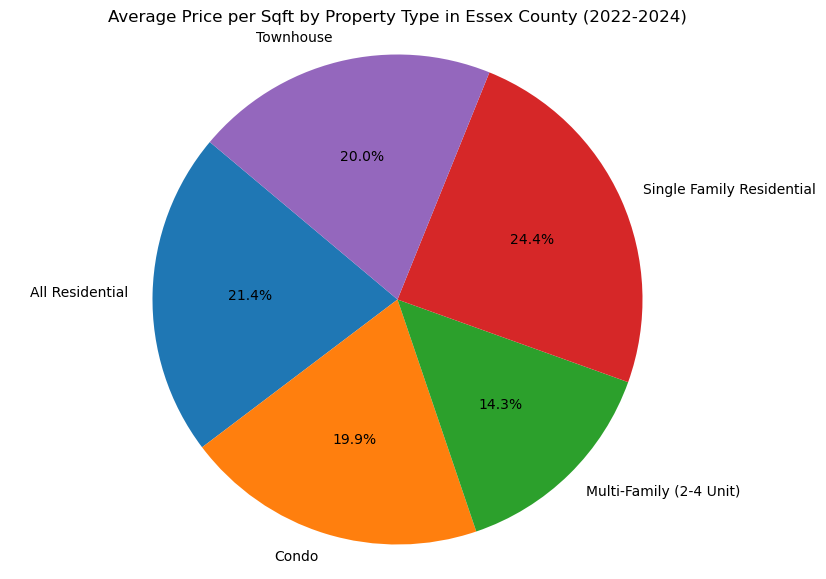

In [7]:
total_average_price = essex_county_summary['Average_Price_per_Sqft'].sum()

# Percentage
essex_county_summary['Price_Percentage'] = (essex_county_summary['Average_Price_per_Sqft'] / total_average_price) * 100

# Plot pie chart
plt.figure(figsize=(10, 7))
plt.pie(
    essex_county_summary['Price_Percentage'], 
    labels=essex_county_summary.index, 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title('Average Price per Sqft by Property Type in Essex County (2022-2024)')
plt.axis('equal')
plt.show()